In [1]:
import speakeazy

In [4]:
spectrum = speakeazy.Data(spectrum_file='../data/macs0417.1208_340.v0.spec.fits',photometry_file=None,run_ID=1,phot_id=None)

spec1d found
Reading in spectrum with grating prism/clear combination
No photometry found


In [5]:
test_priors = speakeazy.priors.Priors(spectrum)

In [7]:
test_priors.params

{'z_in': None,
 'z_range': [0.0, 6.0],
 'scale_disp': 1.3,
 'vel_width': 100.0,
 'vel_width_broad': 300.0,
 'fix_ns': True,
 'nspline': 13,
 'epoly': 3,
 'scale_p': False,
 'ppoly': 0,
 'halpha_prism': 'free',
 'broadlines': False}

In [8]:
test_priors.params['z_range']=[0.5,1.5]

In [9]:
fit = speakeazy.fitting.Fitter(spectrum,test_priors)

In [10]:
fit.fit_redshift_chisq()

256it [00:15, 16.52it/s]
101it [00:03, 28.27it/s]


36 oktemp
full chi2 = 548203.0471258926, cont chi2 = 9936468.90517487
z : 1.4621933694354214
vel_width : 100.0
scale_disp : 1.3
escale_0 : 1.0
escale_1 : 1.0
escale_2 : 1.0
line Hb : 84.1035245026422
line Hg : 94.0757751880759
line Hd : 171.11433100554422
line NII : 2142.329378561314
line NeIII-3968 : 99.20308904244276
line OIII : 322.8602664288818
line OII : 62.12188730874534
line HeI-3889 : 116.79707936021481
line SII : 254.18869496756844
line OII-7325 : 38.261338766636236
line SIII-9068 : 182.5709580518905
line SIII-9531 : 129.65488467494774
line OI-6302 : 131.15180027475748
line PaD : 93.22843077145296
line PaG : 14.258469208995333
line PaB : 196.86291643054477
line PaA : 397.22203429514644
line HeI-1083 : 270.0706556841718
line BrD : 33.27661137353445
line Pa8 : 147.20115069596153
line Pa9 : 28.94825717610436
line Pa10 : 32.62299786957272
line MgII : 12.978307629409267
bspl_0 : 0.7686972322765324
bspl_1 : 1.5778290453473438
bspl_2 : 5.5314046880783385
bspl_3 : 4.889415801348367
bs

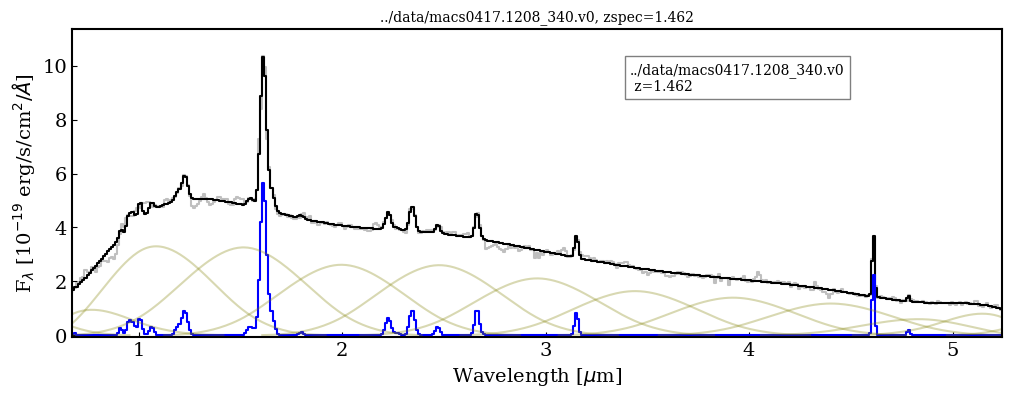

In [11]:
fit.plot_spectrum(save=False)